### Exploring our Cryo-EM dataset
👋 Welcome to the cryo-EM project! This notebook is designed to help you get familiar with the data we'll be using in the wider cryo-EM project, and armed with this knowledge – you can download more specialised datasets from [EMPIAR](https://www.ebi.ac.uk/empiar/), such as [this one](https://www.ebi.ac.uk/empiar/EMPIAR-11211/) which is a Single-particle cryo-EM dataset of ALC1 bound to an asymmetric, site-specifically PARylated nucleosome.

Let's begin by importing our default selection of images (which you can find in the **all_images.npz** file), and check how many images we have imported (we're expecting 300). Next, we'll gather a random selection of images from the dataset to analyse:

In [2]:
import numpy as np
a = np.load("./all_images.npz")
m = a['arr_0']
images = [m[i, :, :] for i in range(m.shape[0])]
print(len(images))

300


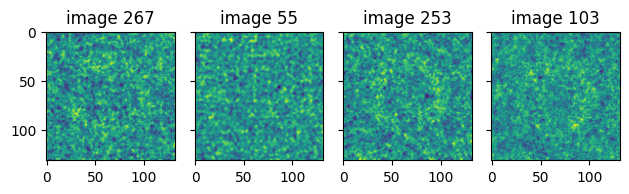

In [4]:
import matplotlib.pyplot as plt
N = 4
fig, axes = plt.subplots(1, N, sharex=True, sharey=True)
Ns = np.random.permutation(np.arange(len(images)))
for ax, i in zip(axes, Ns):
    ax.imshow(images[i])
    ax.set_title(f"image {i}")
fig.tight_layout()
plt.show()

Here is our discriminator code, which we will use in the wider cryo-EM project to decide if an image is just noise, or a particle ✨ We are using a simple method of determining if the images are visually similar enough to known particles to be classified as particles themselves. Finally, we'll analyse the image to determine if there is a particle present!

In [5]:
# discriminator code, use this to decide if an image is just noise
mean_image = sum(images) / len(images)
def is_this_a_particle(image):
    return np.corrcoef(image.ravel(), mean_image.ravel())[0,1] > 0

In [5]:
is_this_a_particle(images[186])

True